In [231]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from nltk.stem.snowball import SnowballStemmer

In [232]:
df_train = pd.read_csv('./data/train.csv', encoding="ISO-8859-1")
df_test = pd.read_csv('./data/test.csv', encoding="ISO-8859-1")
df_desc = pd.read_csv('./data/product_descriptions.csv')

In [233]:
df_train.shape

(74067, 5)

In [234]:
df_test.shape

(166693, 4)

In [235]:
df_train.head()

,id,product_uid,product_title,search_term,relevance
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67


In [236]:
df_desc.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [237]:
df_all = pd.concat((df_train, df_test), axis=0, ignore_index=True)

In [238]:
df_all.head()

,id,product_title,product_uid,relevance,search_term
0,2,Simpson Strong-Tie 12-Gauge Angle,100001,3.00,angle bracket
1,3,Simpson Strong-Tie 12-Gauge Angle,100001,2.50,l bracket
2,9,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,100002,3.00,deck over
3,16,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,100005,2.33,rain shower head
4,17,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,100005,2.67,shower only faucet


In [239]:
df_all.shape

(240760, 5)

In [153]:
df_desc.shape

(124428, 2)

In [240]:
df_all.tail()

,id,product_title,product_uid,relevance,search_term
240755,240756,stufurhome Norma 24 in. W x 16 in. D x 34 in. ...,224424,NaN,24 whtie storage cabinet
240756,240757,Home Decorators Collection 49 in. D Alessandro...,224425,NaN,adirondeck cusion
240757,240758,Simpson Strong-Tie HB 3-1/2 x 14 in. Top Flang...,224426,NaN,hb
240758,240759,1/4 in. -20 tpi x 1-1/2 in. Stainless Steel Bu...,224427,NaN,hex sockets
240759,240760,Bosch 4 in. Bi-Metal Hole Saw,224428,NaN,4 inch hole saw


In [241]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240760 entries, 0 to 240759
Data columns (total 5 columns):
id               240760 non-null int64
product_title    240760 non-null object
product_uid      240760 non-null int64
relevance        74067 non-null float64
search_term      240760 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 9.2+ MB


In [242]:
df_desc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124428 entries, 0 to 124427
Data columns (total 2 columns):
product_uid            124428 non-null int64
product_description    124428 non-null object
dtypes: int64(1), object(1)
memory usage: 1.9+ MB


In [243]:
type(df_all['product_uid'][1])

numpy.int64

In [244]:
type(df_desc['product_uid'][1])

numpy.int64

In [159]:
# df_all['product_uid']=df_all['product_uid'].convert_objects(convert_numeric=True)

/home/zzz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [245]:
df_all = pd.merge(df_all, df_desc, how='left', on='product_uid')

In [246]:
df_all.head()

,id,product_title,product_uid,relevance,search_term,product_description
0,2,Simpson Strong-Tie 12-Gauge Angle,100001,3.00,angle bracket,"Not only do angles make joints stronger, they ..."
1,3,Simpson Strong-Tie 12-Gauge Angle,100001,2.50,l bracket,"Not only do angles make joints stronger, they ..."
2,9,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,100002,3.00,deck over,BEHR Premium Textured DECKOVER is an innovativ...
3,16,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,100005,2.33,rain shower head,Update your bathroom with the Delta Vero Singl...
4,17,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,100005,2.67,shower only faucet,Update your bathroom with the Delta Vero Singl...


In [249]:
df_all.tail()

,id,product_title,product_uid,relevance,search_term,product_description
240755,240756,stufurhome Norma 24 in. W x 16 in. D x 34 in. ...,224424,NaN,24 whtie storage cabinet,Create a neat yet stylish storage space for or...
240756,240757,Home Decorators Collection 49 in. D Alessandro...,224425,NaN,adirondeck cusion,Our Bullnose Adirondack Chair Cushions fit Adi...
240757,240758,Simpson Strong-Tie HB 3-1/2 x 14 in. Top Flang...,224426,NaN,hb,Joist hangers are designed to provide support ...
240758,240759,1/4 in. -20 tpi x 1-1/2 in. Stainless Steel Bu...,224427,NaN,hex sockets,These socket cap screws are ideal for applicat...
240759,240760,Bosch 4 in. Bi-Metal Hole Saw,224428,NaN,4 inch hole saw,The Bosch quick change bi-metal hole saws feat...


In [248]:
df_all.shape

(240760, 6)

## 文本预处理

In [250]:
stemmer = SnowballStemmer('english')

def str_stemmer(s):
    return " ".join([stemmer.stem(word) for word in s.lower().split()])

In [251]:
def str_common_word(str1, str2):
    return sum(int(str2.find(word)>=0) for word in str1.split())

In [252]:
df_all['search_term'] = df_all['search_term'].map(lambda x:str_stemmer(x))
df_all['product_title'] = df_all['product_title'].map(lambda x:str_stemmer(x))
df_all['product_description'] = df_all['product_description'].map(lambda x:str_stemmer(x))

In [253]:
df_all.head()

,id,product_title,product_uid,relevance,search_term,product_description
0,2,simpson strong-ti 12-gaug angl,100001,3.00,angl bracket,"not onli do angl make joint stronger, they als..."
1,3,simpson strong-ti 12-gaug angl,100001,2.50,l bracket,"not onli do angl make joint stronger, they als..."
2,9,behr premium textur deckov 1-gal. #sc-141 tugb...,100002,3.00,deck over,behr premium textur deckov is an innov solid c...
3,16,delta vero 1-handl shower onli faucet trim kit...,100005,2.33,rain shower head,updat your bathroom with the delta vero single...
4,17,delta vero 1-handl shower onli faucet trim kit...,100005,2.67,shower onli faucet,updat your bathroom with the delta vero single...


In [257]:
df_all['len_of_query'] = df_all['search_term'].map(lambda x:len(x.split())).astype(np.int64)
df_all['commons_in_title'] = df_all.apply(lambda x:str_common_word(x['search_term'],x['product_title']), axis=1)
df_all['commons_in_desc'] = df_all.apply(lambda x:str_common_word(x['search_term'],x['product_description']), axis=1)

In [258]:
df_all.head()

,id,product_title,product_uid,relevance,search_term,product_description,len_of_query,commons_in_title,commons_in_desc
0,2,simpson strong-ti 12-gaug angl,100001,3.00,angl bracket,"not onli do angl make joint stronger, they als...",2,1,1
1,3,simpson strong-ti 12-gaug angl,100001,2.50,l bracket,"not onli do angl make joint stronger, they als...",2,1,1
2,9,behr premium textur deckov 1-gal. #sc-141 tugb...,100002,3.00,deck over,behr premium textur deckov is an innov solid c...,2,1,1
3,16,delta vero 1-handl shower onli faucet trim kit...,100005,2.33,rain shower head,updat your bathroom with the delta vero single...,3,1,1
4,17,delta vero 1-handl shower onli faucet trim kit...,100005,2.67,shower onli faucet,updat your bathroom with the delta vero single...,3,3,2


In [259]:
df_all.shape

(240760, 9)

In [262]:
np.isnan(df_all['commons_in_desc']).any()

False

In [263]:
df_all = df_all.drop(['search_term','product_title','product_description'],axis=1)

In [264]:
df_all.head()

,id,product_uid,relevance,len_of_query,commons_in_title,commons_in_desc
0,2,100001,3.00,2,1,1
1,3,100001,2.50,2,1,1
2,9,100002,3.00,2,1,1
3,16,100005,2.33,3,1,1
4,17,100005,2.67,3,3,2


In [266]:
df_all.shape

(240760, 6)

In [267]:
df_train.index

RangeIndex(start=0, stop=74067, step=1)

In [268]:
df_test.index

RangeIndex(start=0, stop=166693, step=1)

In [318]:
df_train = df_all.loc[df_train.index]
df_test = df_all.loc[df_test.index]
test_ids = df_test['id']

In [319]:
df_train.shape

(74067, 6)

In [320]:
df_test.shape

(166693, 6)

In [321]:
df_train.head()

,id,product_uid,relevance,len_of_query,commons_in_title,commons_in_desc
0,2,100001,3.00,2,1,1
1,3,100001,2.50,2,1,1
2,9,100002,3.00,2,1,1
3,16,100005,2.33,3,1,1
4,17,100005,2.67,3,3,2


In [322]:
df_train.tail()

,id,product_uid,relevance,len_of_query,commons_in_title,commons_in_desc
74062,221457,206638,1.00,3,1,1
74063,221458,206639,3.00,3,3,2
74064,221463,206641,2.33,7,2,4
74065,221471,206648,3.00,3,2,2
74066,221473,206650,2.33,5,3,2


In [323]:
df_test.head()

,id,product_uid,relevance,len_of_query,commons_in_title,commons_in_desc
74067,1,100001,NaN,3,0,1
74068,4,100001,NaN,3,1,1
74069,5,100001,NaN,3,1,1
74070,6,100001,NaN,3,2,2
74071,7,100001,NaN,4,2,2


In [324]:
df_test.tail()

,id,product_uid,relevance,len_of_query,commons_in_title,commons_in_desc
240755,240756,224424,NaN,4,3,3
240756,240757,224425,NaN,2,0,0
240757,240758,224426,NaN,1,1,1
240758,240759,224427,NaN,2,2,2
240759,240760,224428,NaN,4,3,2


In [326]:
test_ids

74067          1
74068          4
74069          5
74070          6
74071          7
74072          8
74073         10
74074         11
74075         12
74076         13
74077         14
74078         15
74079         19
74080         22
74081         24
74082         25
74083         26
74084         28
74085         29
74086         30
74087         31
74088         32
74089         33
74090         36
74091         39
74092         40
74093         41
74094         42
74095         43
74096         44
           ...  
240730    240731
240731    240732
240732    240733
240733    240734
240734    240735
240735    240736
240736    240737
240737    240738
240738    240739
240739    240740
240740    240741
240741    240742
240742    240743
240743    240744
240744    240745
240745    240746
240746    240747
240747    240748
240748    240749
240749    240750
240750    240751
240751    240752
240752    240753
240753    240754
240754    240755
240755    240756
240756    240757
240757    2407

In [347]:
y_train = df_train['relevance'].values
X_train = df_train.drop(['id','relevance','product_uid'],axis=1).values
X_test = df_test.drop(['id','relevance','product_uid'],axis=1).values

In [348]:
X_train

array([[2, 1, 1],
       [2, 1, 1],
       [2, 1, 1],
       ..., 
       [7, 2, 4],
       [3, 2, 2],
       [5, 3, 2]])

In [349]:
y_train

array([ 3.  ,  2.5 ,  3.  , ...,  2.33,  3.  ,  2.33])

In [350]:
X_test

array([[3, 0, 1],
       [3, 1, 1],
       [3, 1, 1],
       ..., 
       [1, 1, 1],
       [2, 2, 2],
       [4, 3, 2]])

In [351]:
X_train.shape

(74067, 3)

In [352]:
y_train.shape

(74067,)

In [353]:
X_test.shape

(166693, 3)

In [358]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
params = [1,3,5,6,7,8,9,10,15]
test_scores = []
for param in params:
    clf = RandomForestRegressor(n_estimators=30, max_depth=param)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

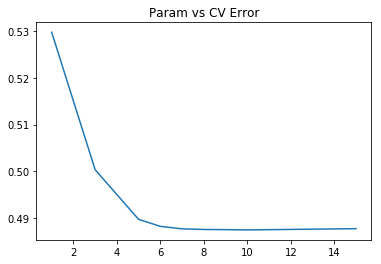

In [359]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(params, test_scores)
plt.title("Param vs CV Error");

In [360]:
rf = RandomForestRegressor(n_estimators=30, max_depth=10)

In [361]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [362]:
X_test

array([[3, 0, 1],
       [3, 1, 1],
       [3, 1, 1],
       ..., 
       [1, 1, 1],
       [2, 2, 2],
       [4, 3, 2]])

In [363]:
y_pred = rf.predict(X_test)

In [365]:
pd.DataFrame({"id": test_ids, "relevance": y_pred}).to_csv('submission.csv',index=False)

In [366]:
test_ids

74067          1
74068          4
74069          5
74070          6
74071          7
74072          8
74073         10
74074         11
74075         12
74076         13
74077         14
74078         15
74079         19
74080         22
74081         24
74082         25
74083         26
74084         28
74085         29
74086         30
74087         31
74088         32
74089         33
74090         36
74091         39
74092         40
74093         41
74094         42
74095         43
74096         44
           ...  
240730    240731
240731    240732
240732    240733
240733    240734
240734    240735
240735    240736
240736    240737
240737    240738
240738    240739
240739    240740
240740    240741
240741    240742
240742    240743
240743    240744
240744    240745
240745    240746
240746    240747
240747    240748
240748    240749
240749    240750
240750    240751
240751    240752
240752    240753
240753    240754
240754    240755
240755    240756
240756    240757
240757    2407